# Tipo de Rede Neural Utilizada

Para a classificação de imagens de frutas (maçã, banana e laranja), utilizamos uma Rede Neural Convolucional (CNN - Convolutional Neural Network). Esse tipo de rede é ideal para tarefas de visão computacional, pois consegue extrair automaticamente padrões espaciais das imagens, como texturas e formas, tornando-a mais eficiente que redes neurais totalmente conectadas para esse tipo de problema.


In [1]:
# Importação das bibliotecas necessárias
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [2]:
# Caminho para o diretório do dataset
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Pré-processamento das imagens

As imagens do banco de dados foram pré-processadas utilizando a biblioteca ImageDataGenerator para normalização dos pixels, convertendo os valores para a faixa de 0 a 1 (divisão por 255). Além disso, as imagens foram redimensionadas para 128x128 pixels para garantir um tamanho uniforme e adequado à entrada do modelo.

O conjunto de dados foi carregado a partir de diretórios estruturados para treinamento e teste, utilizando a abordagem de classificação por diretórios (flow_from_directory).

In [ ]:
# Definindo o pré-processamento das imagens para treinamento
train_datagen = ImageDataGenerator(
    rescale=1./255,              
    rotation_range=40,           
    width_shift_range=0.2,       
    height_shift_range=0.2,      
    shear_range=0.2,             
    zoom_range=0.2,              
    horizontal_flip=True,        
    fill_mode='nearest'          
)

# Apenas normalização para teste
test_datagen = ImageDataGenerator(rescale=1./255)

# Carregar as imagens de treinamento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  
    batch_size=32,           
    class_mode='sparse',     
    shuffle=True             # Embaralha as imagens para evitar overfitting
)

# Carregar as imagens de teste
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    shuffle=False            # Não embaralha no teste
)

Found 220 images belonging to 3 classes.
Found 55 images belonging to 3 classes.


# Modelo de Rede Neural e Estrutura das Camadas

O modelo de rede neural foi construído com TensorFlow/Keras e inclui três camadas convolucionais (Conv2D) com ativação ReLU para extrair características das imagens. Camadas de pooling (MaxPooling2D) reduzem a dimensionalidade e destacam informações importantes. A camada Flatten transforma os dados em um vetor 1D para as camadas densas (Dense), onde a primeira tem 128 neurônios (ReLU) e a camada final, com 3 neurônios (softmax), classifica as imagens entre maçã, banana ou laranja.

In [ ]:
# Criação do modelo CNN (Rede Neural Convolucional)
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Regularização para evitar overfitting

model.add(layers.Dense(3, activation='softmax'))

model.summary()

c:\Users\eriva\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# Compilação e Treinamento do Modelo

O modelo foi compilado com a função de perda categorical_crossentropy, adequada para classificação multiclasse, e o otimizador Adam, que ajusta os pesos de forma eficiente e acelera a convergência. A métrica de avaliação escolhida foi a acurácia (accuracy), que mede a taxa de classificações corretas. O treinamento foi realizado por 10 épocas, utilizando o conjunto de treinamento e validando o desempenho com o conjunto de teste.

In [5]:
# Compilação do modelo
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# Treinamento do modelo com o gerador de dados
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator  
)

c:\Users\eriva\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\eriva\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3354 - loss: 1.1694 - val_accuracy: 0.6182 - val_loss: 0.8340
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 641ms/step - accuracy: 0.6863 - loss: 0.7966 - val_accuracy: 0.6909 - val_loss: 0.8493
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 559ms/step - accuracy: 0.8076 - loss: 0.5532 - val_accuracy: 0.9091 - val_loss: 0.4789
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 582ms/step - accuracy: 0.8580 - loss: 0.4989 - val_accuracy: 0.8000 - val_loss: 0.6909
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 565ms/step - accuracy: 0.8253 - loss: 0.4545 - val_accuracy: 0.9455 - val_loss: 0.3916
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 549ms/step - accuracy: 0.8490 - loss: 0.3745 - val_accuracy: 0.9273 - val_loss: 0.2771
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 603ms/step - accuracy: 0.8921 - loss: 0.2867 - val_accuracy: 0.8909 - val_loss: 0.3853
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 560ms/step - accuracy: 0.9253 - loss: 0.1964 - val_accuracy: 0.8727 - val_loss: 0

# Processo de Avaliação e Validação do Modelo

Após o treinamento, a performance do modelo foi avaliada no conjunto de teste, verificando a acurácia final. O modelo foi então testado com imagens novas para validar sua capacidade de generalização.

In [7]:
# Avaliação do modelo no conjunto de teste
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9653 - loss: 0.1826
Test Accuracy: 0.9636363387107849


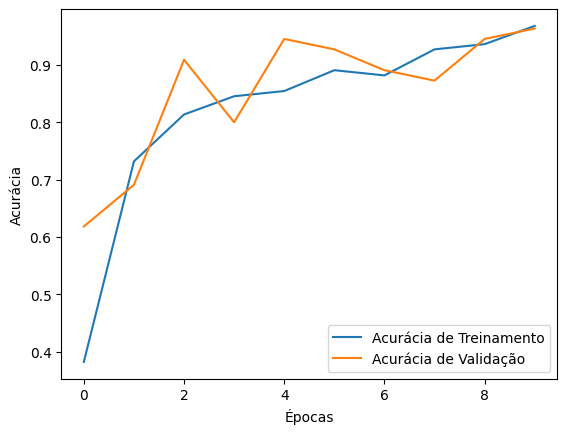

In [9]:
# Visualização do histórico de treinamento
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np


image_path = 'dataset/imagem.jpg'

img = image.load_img(image_path, target_size=(128, 128))

# Converter a imagem para um array de numpy
img_array = image.img_to_array(img)

# Normalizar a imagem (escala de 0 a 1)
img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

# Verificando a forma da imagem processada
print(img_array.shape)

(1, 128, 128, 3)


In [11]:
# Realizar a predição
prediction = model.predict(img_array)

# Imprimir o resultado
class_names = ['maçã', 'banana', 'laranja']
predicted_class = class_names[np.argmax(prediction)]

print(f'A fruta é: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
A fruta é: maçã


# Conclusão

O modelo desenvolvido consegue identificar corretamente se uma imagem enviada pertence a uma maçã, banana ou laranja. Utilizando uma CNN, ele extrai características das imagens e realiza a classificação com alta precisão. Esse sistema pode ser integrado a um e-commerce para facilitar a categorização automática de frutas, melhorando a eficiência do processo.